<a id="toc"></a>

## <p style="background-color:#FFE7BA; font-family:monospace; color:#2D2727; font-size:150%; text-align:center; border-radius:10px 10px;">SPOTIFY & YOUTUBE EDA PROJECT</p>

This notebook performs Exploratory Data Analysis (EDA) of dataset of top 10 songs of various artists in Spotify and Youtube.<br>
* [The Dataset Link](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube) 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("Spotify_Youtube.csv")

## Understanding the data

In [3]:
def information(df):
    
    print(df.info())
    print("---------------------------------------------------------------") 
    print(df.describe())
    print("---------------------------------------------------------------") 
    print(df.shape )
    print("---------------------------------------------------------------") 
    print(df.columns)
    print("---------------------------------------------------------------") 
    print(df.index)
    print("---------------------------------------------------------------") 

In [4]:
information(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

### Cleaning and Manipulating

In [63]:
df.isna().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

* Not so many null values in the spotify data, no need to drop anything.
* Youtube data has so many null values, which can be caused by the absence of the songs that contained in the Spotify, so we can just compare the two list.

In [54]:
# dropped some unnecessary columns.
colsdrop = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Description']
df = df.drop(colsdrop, axis=1)
df

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.7720,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.8520,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.5510,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.5780,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.5250,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,0.448000,...,0.6580,90.002,94667.0,SICK LEGEND - Topic,71678.0,1113.0,0.0,True,True,9.227144e+06
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,0.028000,...,0.6570,174.869,150857.0,SICK LEGEND - Topic,164741.0,2019.0,0.0,True,True,1.089818e+07
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,0.024300,...,0.4190,168.388,136842.0,SICK LEGEND - Topic,35646.0,329.0,0.0,True,True,6.226110e+06
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,0.356000,...,0.5390,155.378,108387.0,SICK LEGEND - Topic,6533.0,88.0,0.0,True,True,6.873961e+06


In [56]:
 #converting the track duration from milliseconds to minutes
df["Duration_ms"] = round((df["Duration_ms"]/60000), 2)

### Data from Spotify

In [170]:
df_sp = df.iloc[:, 0:15]
df_sp

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,3.71
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,3.34
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,3.59
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,3.90
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,5.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,1.58
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,2.51
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,2.28
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,1.81


### Data from Youtube

In [171]:
df_yt = df.iloc[:, 16:20]
df_yt

,Views,Likes,Comments,Licensed
0,693555221.0,6220896.0,169907.0,True
1,72011645.0,1079128.0,31003.0,True
2,8435055.0,282142.0,7399.0,True
3,211754952.0,1788577.0,55229.0,True
4,618480958.0,6197318.0,155930.0,True
...,...,...,...,...
20713,71678.0,1113.0,0.0,True
20714,164741.0,2019.0,0.0,True
20715,35646.0,329.0,0.0,True
20716,6533.0,88.0,0.0,True


### The most liked artists on Youtube

In [173]:
most_liked_artists = df.groupby("Artist")["Likes"].sum().sort_values(ascending=False)
most_liked_artists = pd.DataFrame(most_liked_artists)
most_liked_artists.head(10)

,Likes
Artist,
BTS,139403808.0
BLACKPINK,132302505.0
Charlie Puth,86336925.0
Ed Sheeran,83543319.0
Justin Bieber,78584348.0
Billie Eilish,73338537.0
Imagine Dragons,72274477.0
Alan Walker,67977702.0
DJ Snake,67775831.0


In [52]:
df_sp["Artist"].unique()

array(['Gorillaz', 'Red Hot Chili Peppers', '50 Cent', ..., 'LE SSERAFIM',
       'ThxSoMch', 'SICK LEGEND'], dtype=object)

#### Streams by Artists (Top 10)

In [122]:
stream_by_artist = df.groupby("Artist")["Stream"].sum().sort_values(ascending=False)
stream_by_artist = pd.DataFrame(stream_by_artist)
stream_by_artist.head(10)

,Stream
Artist,
Post Malone,1.525126e+10
Ed Sheeran,1.439488e+10
Dua Lipa,1.340808e+10
XXXTENTACION,1.322435e+10
The Weeknd,1.303197e+10
Justin Bieber,1.209777e+10
Imagine Dragons,1.185831e+10
Coldplay,1.177848e+10
Khalid,1.138684e+10


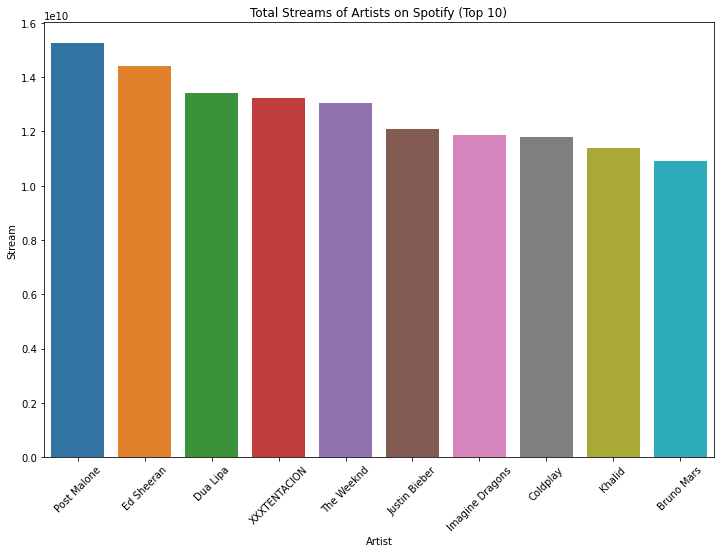

In [129]:
plt.figure(figsize=(12,8))
sns.barplot(data=stream_by_artist.head(10), x=stream_by_artist.head(10).index, y=stream_by_artist.head(10).Stream)
plt.xticks(rotation=45);
plt.title("Total Streams of Artists on Spotify (Top 10)");

### Songs that the most streamed on spotify

In [37]:
songs_by_stream = df.groupby("Track")["Stream"].sum().sort_values(ascending=False)
songs_by_stream = pd.DataFrame(songs_by_stream)
songs_by_stream.head(10)

,Stream
Track,
Closer,5.465365e+09
Can't Hold Us (feat. Ray Dalton),5.225629e+09
Sunflower - Spider-Man: Into the Spider-Verse,5.076660e+09
Happier,4.757615e+09
STAY (with Justin Bieber),4.731555e+09
Señorita,4.672440e+09
The Middle,4.566883e+09
Eastside (with Halsey & Khalid),4.274888e+09
lovely (with Khalid),4.221148e+09


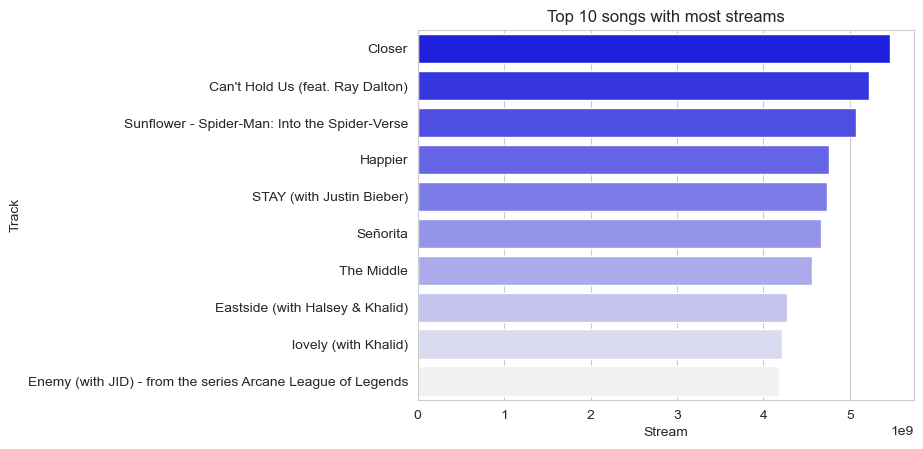

In [40]:
colors = sns.light_palette("blue", n_colors=10, reverse=True)
sns.barplot(data=songs_by_stream.head(10), x=songs_by_stream.head(10).Stream, y=songs_by_stream.head(10).index, orient = "h", palette=colors);
plt.title('Top 10 songs with most streams');

In [49]:
songs_by_view = df.groupby("Track")["Views"].sum().sort_values(ascending=False)
songs_by_view = pd.DataFrame(songs_by_view)
songs_by_view.head(10)

,Views
Track,
Despacito,1.615930e+10
See You Again (feat. Charlie Puth),1.154760e+10
Lean On,9.974505e+09
Shape of You,5.908398e+09
Calma - Remix,5.322011e+09
This Is What You Came For,5.252060e+09
Swalla (feat. Nicki Minaj & Ty Dolla $ign),5.162404e+09
Wheels on the Bus,4.898831e+09
"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",4.828403e+09


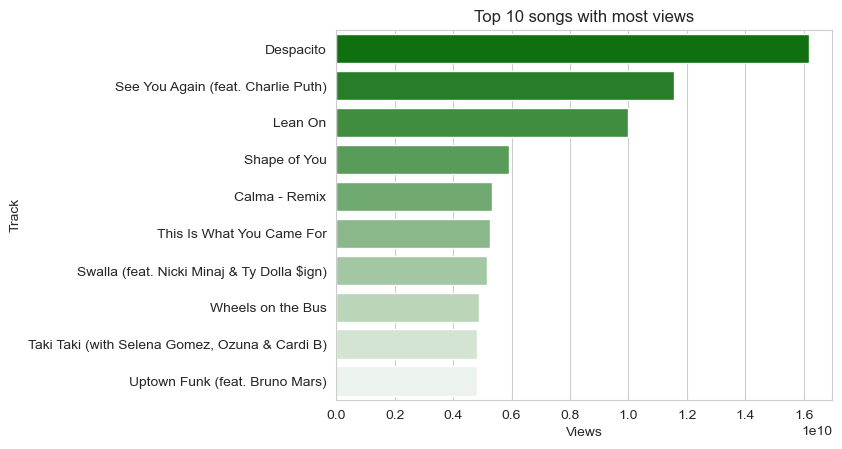

In [44]:
colors = sns.light_palette("green", n_colors=10, reverse=True)
sns.barplot(data=songs_by_view.head(10), x=songs_by_view.head(10).Views, y=songs_by_view.head(10).index, orient = "h", palette=colors);
plt.title('Top 10 songs with most views');

In [48]:
songs_by_likes = df.groupby("Track")["Likes"].sum().sort_values(ascending=False)
songs_by_likes = pd.DataFrame(songs_by_likes)
songs_by_likes.head(10)

,Likes
Track,
Despacito,101577278.0
See You Again (feat. Charlie Puth),80295292.0
Boy With Luv (feat. Halsey),55176413.0
lovely (with Khalid),48852042.0
Lean On,48633206.0
Señorita,39692236.0
Old Town Road - Remix,37889373.0
"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",37552053.0
Dynamite,36609928.0


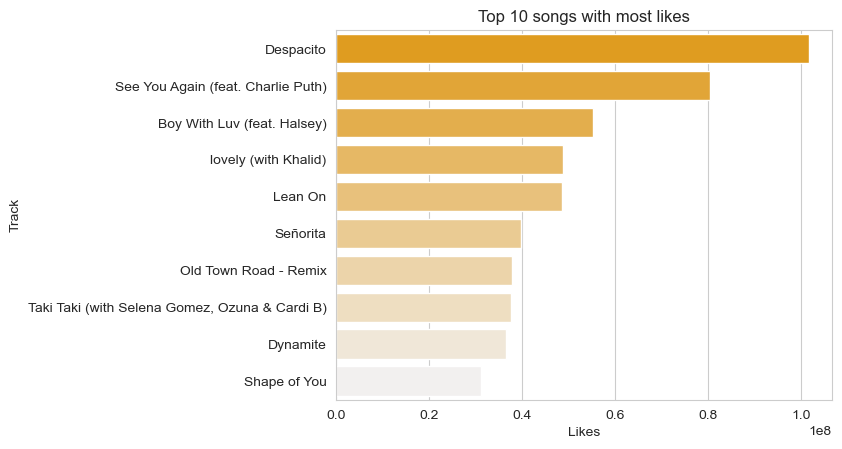

In [47]:
colors = sns.light_palette("orange", n_colors=10, reverse=True)
sns.barplot(data=songs_by_likes.head(10), x=songs_by_likes.head(10).Likes, y=songs_by_likes.head(10).index, orient = "h", palette=colors);
plt.title('Top 10 songs with most likes');

In [12]:
most_streamed = df.sort_values('Stream', ascending=False).head(10)
most_streamed[['Artist', 'Track', 'Energy', 'Danceability', 'Acousticness']]

,Artist,Track,Energy,Danceability,Acousticness
15250,The Weeknd,Blinding Lights,0.730,0.514,0.00146
12452,Ed Sheeran,Shape of You,0.652,0.825,0.58100
19186,Lewis Capaldi,Someone You Loved,0.405,0.501,0.75100
17937,Post Malone,rockstar (feat. 21 Savage),0.520,0.585,0.12400
17445,Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
17938,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
13503,Drake,One Dance,0.625,0.792,0.00776
16099,The Chainsmokers,Closer,0.524,0.748,0.41400
16028,Halsey,Closer,0.524,0.748,0.41400
14030,Imagine Dragons,Believer,0.780,0.776,0.06220


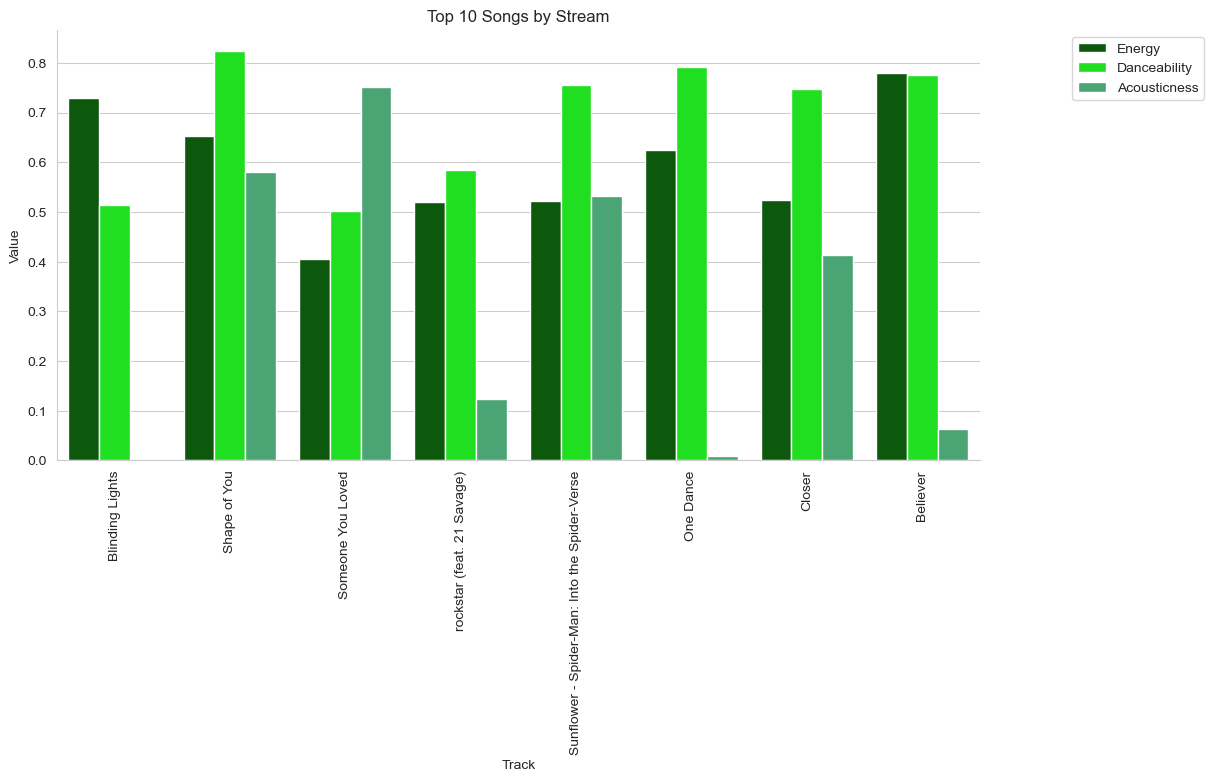

In [18]:
most_streamed_melt = most_streamed.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')
sns.catplot(x='Track', y='Value', hue='Attribute', data=most_streamed_melt, kind='bar',
            palette={'Energy': 'darkgreen', 'Danceability': 'lime', 'Acousticness': 'mediumseagreen'},
            aspect=2, legend=False)


plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Top 10 Songs by Stream')
plt.xlabel('Track')
plt.ylabel('Value')

plt.xticks(rotation=90)
plt.show()

#### Comparing the album types in spotify

In [131]:
df["Album_type"].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [141]:
numof_album_types = df["Album_type"].value_counts()
#numof_album_types = pd.DataFrame(numof_album_types)

In [142]:
numof_album_types

album          14926
single          5004
compilation      788
Name: Album_type, dtype: int64

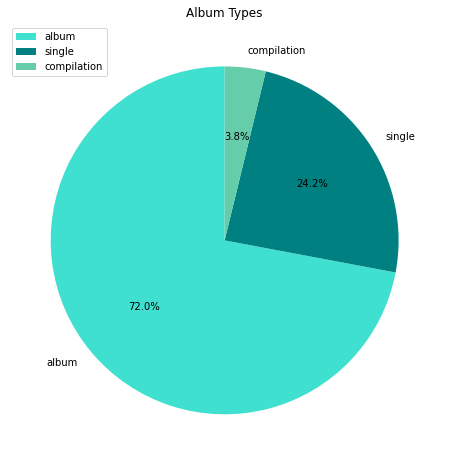

In [152]:
labels = numof_album_types.index.tolist()
sizes = numof_album_types.values.tolist()

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['turquoise', 'teal', 'mediumaquamarine'])
plt.title('Album Types')
plt.legend(labels, loc='best')

plt.show()

In [165]:
view_vs_stream = df.groupby("Artist")["Views", "Stream"].sum().sort_values(by=["Views","Stream"], ascending=(False, False))
view_vs_stream = pd.DataFrame(view_vs_stream)
view_vs_stream.head(10)

C:\Users\User\AppData\Local\Temp/ipykernel_43104/308994961.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  view_vs_stream = df.groupby("Artist")["Views", "Stream"].sum().sort_values(by=["Views","Stream"], ascending=(False, False))


,Views,Stream
Artist,,
Ed Sheeran,1.546021e+10,1.439488e+10
CoComelon,1.460167e+10,3.690822e+08
Katy Perry,1.312063e+10,6.607329e+09
Charlie Puth,1.216759e+10,7.041187e+09
Luis Fonsi,1.162811e+10,5.054326e+09
Justin Bieber,1.099106e+10,1.209777e+10
Daddy Yankee,1.087193e+10,5.135462e+09
Bruno Mars,1.024092e+10,1.089786e+10
Macklemore & Ryan Lewis,1.012206e+10,3.982978e+09


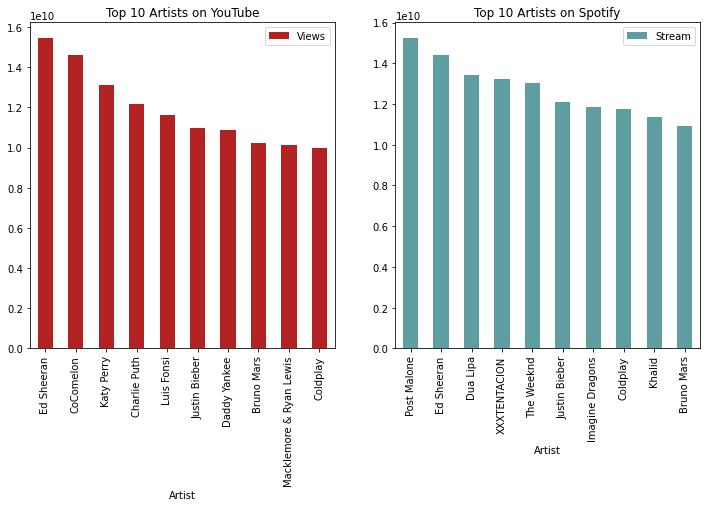

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.set_title('Top 10 Artists on YouTube')
views_of_artists.head(10).plot(kind='bar', ax=ax1, color=["firebrick"])

ax2.set_title('Top 10 Artists on Spotify')
stream_by_artist.head(10).plot(kind='bar', ax=ax2, color=["cadetblue"]);

### Youtube views of artists (top 10)

In [31]:
views_of_artists = df.groupby("Artist")["Views"].sum().sort_values(ascending=False)
views_of_artists = pd.DataFrame(views_of_artists)
views_of_artists

,Views
Artist,
Ed Sheeran,1.546021e+10
CoComelon,1.460167e+10
Katy Perry,1.312063e+10
Charlie Puth,1.216759e+10
Luis Fonsi,1.162811e+10
...,...
Jorge & Mateus,0.000000e+00
Yovie & Nuno,0.000000e+00
Angus & Julia Stone,0.000000e+00


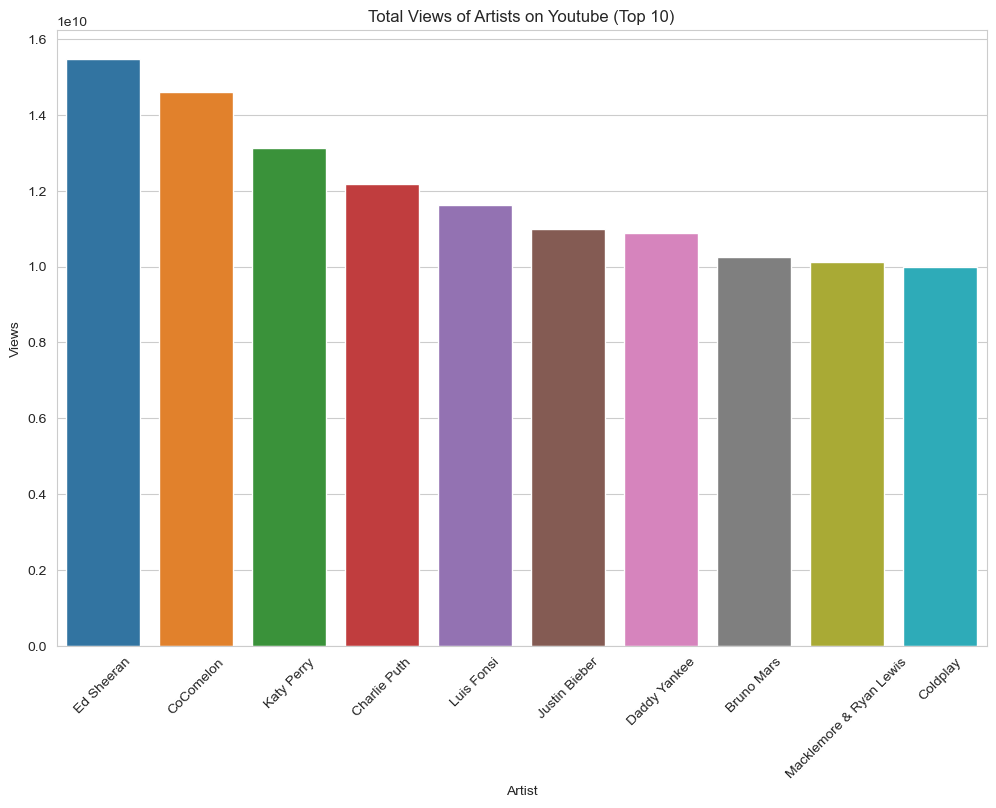

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(data = views_of_artists.head(10), x = views_of_artists.head(10).index, y = views_of_artists.head(10).Views)
plt.xticks(rotation=45);
plt.title("Total Views of Artists on Youtube (Top 10)");

### The songs that have biggest valence, which have happiest vibe

In [201]:
happiest_songs = df[df["Valence"] > 0.6].sort_values(by="Valence", ascending=False)

In [203]:
mean_views = df["Views"].mean()
mean_streams = df["Stream"].mean()

In [207]:
happiest_songs[(happiest_songs["Views"] > mean_views) & (happiest_songs["Stream"] > mean_streams)].head(10)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
1617,"Earth, Wind & Fire",September,"The Best Of Earth, Wind & Fire Vol. 1",compilation,0.697,0.832,9.0,-7.264,0.0298,0.1680,...,0.979,125.926,3.58,EarthWindandFireVEVO,6.414077e+08,4804872.0,305112.0,True,True,1.197922e+09
779,Madonna,Material Girl,Celebration (double disc version),compilation,0.742,0.883,0.0,-3.419,0.0329,0.3330,...,0.978,136.506,4.00,Madonna,1.340641e+08,1295486.0,41072.0,True,True,3.136672e+08
8747,Banda Los Recoditos,Mi Último Deseo,El Free,album,0.844,0.639,11.0,-4.461,0.0437,0.6200,...,0.974,121.033,2.73,BandaLosRecoditosVEVO,7.728564e+08,2284712.0,30474.0,True,True,2.285255e+08
693,Juanes,La Camisa Negra,Mi Sangre,album,0.751,0.731,6.0,-4.419,0.0308,0.0838,...,0.973,97.007,3.61,JuanesVEVO,1.857240e+08,1156885.0,29495.0,True,True,2.757652e+08
2268,Boney M.,Rasputin - Single Version,Fantastic Boney M.,album,0.694,0.719,6.0,-12.734,0.0480,0.4700,...,0.972,126.212,3.68,BoneyMVEVO,4.189574e+08,3435429.0,126425.0,True,True,2.621323e+08
1448,La Arrolladora Banda El Limón De Rene Camacho,Ya Te Perdí La Fe,Ojos En Blanco,album,0.757,0.512,0.0,-6.249,0.0516,0.7220,...,0.970,149.888,2.45,ArrolladoraLimonVEVO,1.282967e+08,423736.0,5221.0,True,True,1.912692e+08
16372,Lenin Ramírez,Recordando a Manuel,Bendecído,album,0.739,0.744,10.0,-1.589,0.0376,0.4270,...,0.970,120.083,3.47,DEL Records,3.651073e+08,964821.0,16372.0,True,True,1.394062e+08
785,Madonna,Like a Virgin,Like a Virgin (Reissue),album,0.771,0.655,3.0,-10.842,0.0372,0.1520,...,0.970,119.747,3.64,Madonna,1.089168e+08,594293.0,27023.0,True,True,2.098525e+08
2695,Mary J. Blige,Family Affair,No More Drama,album,0.911,0.551,8.0,-3.750,0.0449,0.1320,...,0.969,92.887,4.43,MaryJBligeVEVO,4.145882e+08,2079943.0,31831.0,True,True,3.196622e+08
17285,Shawn Mendes,There's Nothing Holdin' Me Back,Illuminate (Deluxe),album,0.866,0.813,11.0,-4.063,0.0554,0.3800,...,0.969,121.998,3.32,ShawnMendesVEVO,1.168946e+09,8771309.0,209203.0,True,True,1.546722e+09


* The happiest songs are given above according to the valence values of them. Valence values greater than 0.6 are accepted as happier songs. 

* Also views and stream numbers of these songs are analyzed. I wanted to see the happiest songs that have view and stream number greater than their means.

* Interestingly, bigger valence does not mean that the song has bigger danceability (in a certain way).


In [209]:
happiest_songs.corr() #checked the correlation between danceability and valence

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
Danceability,1.000000,-0.074161,0.018652,0.101760,0.107687,-0.094927,-0.074574,-0.155640,0.174895,-0.231804,-0.032993,0.085875,0.097707,0.028473,0.060432
Energy,-0.074161,1.000000,-0.001122,0.650063,-0.061306,-0.462004,-0.031839,0.130762,0.077731,0.078596,0.059403,0.049626,0.048246,0.032167,0.034709
Key,0.018652,-0.001122,1.000000,0.003443,0.015833,-0.023013,0.030060,-0.025178,0.017687,-0.000747,0.006313,-0.008632,-0.002915,0.007222,-0.022703
Loudness,0.101760,0.650063,0.003443,1.000000,-0.047448,-0.300625,-0.190382,0.045992,0.000717,0.049892,-0.042768,0.115466,0.123143,0.054900,0.110044
Speechiness,0.107687,-0.061306,0.015833,-0.047448,1.000000,0.027325,-0.074461,0.078816,-0.138664,0.003312,-0.040652,-0.000933,0.019355,0.012146,-0.022219
Acousticness,-0.094927,-0.462004,-0.023013,-0.300625,0.027325,1.000000,0.012597,0.062758,0.043888,-0.036458,-0.060043,-0.046205,-0.064156,-0.045116,-0.103936
Instrumentalness,-0.074574,-0.031839,0.030060,-0.190382,-0.074461,0.012597,1.000000,-0.029859,0.024701,0.024352,-0.015060,-0.048576,-0.045207,-0.016871,-0.051790
Liveness,-0.155640,0.130762,-0.025178,0.045992,0.078816,0.062758,-0.029859,1.000000,-0.087723,-0.004667,-0.020308,-0.028413,-0.032305,-0.015455,-0.043290
Valence,0.174895,0.077731,0.017687,0.000717,-0.138664,0.043888,0.024701,-0.087723,1.000000,0.066466,-0.035648,-0.003628,-0.031021,-0.019577,-0.037717
Tempo,-0.231804,0.078596,-0.000747,0.049892,0.003312,-0.036458,0.024352,-0.004667,0.066466,1.000000,-0.048148,0.000910,0.003239,0.007706,-0.011740


### Duration of the Songs

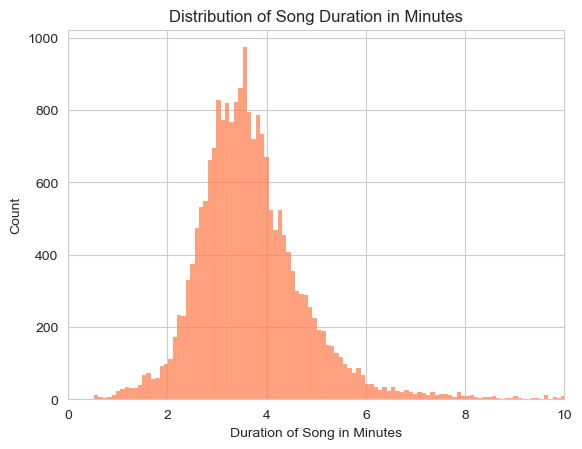

In [57]:
fig, ax = plt.subplots()
sns.histplot(data=df,
             x="Duration_ms",
             ax=ax, color='coral')
ax.set(xlabel='Duration of Song in Minutes', 
       title='Distribution of Song Duration in Minutes', 
       xlim=(0,10))
plt.show()